<a href="https://colab.research.google.com/github/mika3/LocalAccountsApp/blob/master/J_tech_2(openAI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai

In [ ]:
import os
import openai
openai.api_key = ""


#OpenAI Complete

In [ ]:
response = openai.Completion.create(model="text-davinci-003",
                                    prompt="京都工芸繊維大学の大学はどういう大学ですか？",
                                    temperature=0.5, max_tokens=100)
response

<OpenAIObject text_completion id=cmpl-7ldoyAyp43APY7AtO9oCO162NuyIR at 0x79f4344dc9a0> JSON: {
  "warning": "This model version is deprecated. Migrate before January 4, 2024 to avoid disruption of service. Learn more https://platform.openai.com/docs/deprecations",
  "id": "cmpl-7ldoyAyp43APY7AtO9oCO162NuyIR",
  "object": "text_completion",
  "created": 1691588844,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\n\u6771\u4eac\u90fd\u5de5\u82b8\u7e4a\u7dad\u5927\u5b66\u306f\u3001\u30c6\u30ad\u30b9\u30bf\u30a4\u30eb\u3001\u7e4a\u7dad\u3001\u8863\u6599\u3001\u30c7\u30b6\u30a4\u30f3\u3001\u7d4c\u55b6\u306a\u3069\u3092\u5b66\u3076\u7dcf\u5408\u7684\u306a\u30c6\u30ad\u30b9\u30bf\u30a4\u30eb\u5c02\u9580\u5927\u5b66\u3067\u3059\u3002\u30c6\u30ad\u30b9\u30bf\u30a4\u30eb\u5206\u91ce\u306e\u5c02\u9580",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 37,
    "completion_tokens": 99,
    "total_tokens": 136

In [ ]:
response.choices[0].text

'\n\n東京都工芸繊維大学は、テキスタイル、繊維、衣料、デザイン、経営などを学ぶ総合的なテキスタイル専門大学です。テキスタイル分野の専門'

#OpenAI Images

In [ ]:
response = openai.Image.create(
  prompt="An old street in Kyoto",
  n=1,
  size="1024x1024"
)
image_url = response['data'][0]['url']
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-2l5XBqfFpsvUS3CJYncT9MYS/user-8GkNijR0ieO5ISbJ6e32xWJX/img-r5k8ClDDOrUER5jJor67FINR.png?st=2023-08-09T12%3A47%3A35Z&se=2023-08-09T14%3A47%3A35Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-08-08T16%3A57%3A08Z&ske=2023-08-09T16%3A57%3A08Z&sks=b&skv=2021-08-06&sig=JMJkv3SnH/8ZLMU4fYHbtpGXoVv0ZhigOAQMGG8v404%3D'

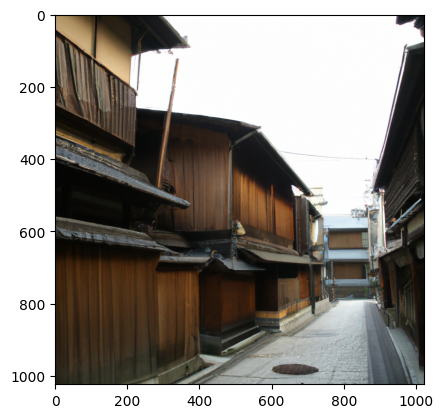

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.show()

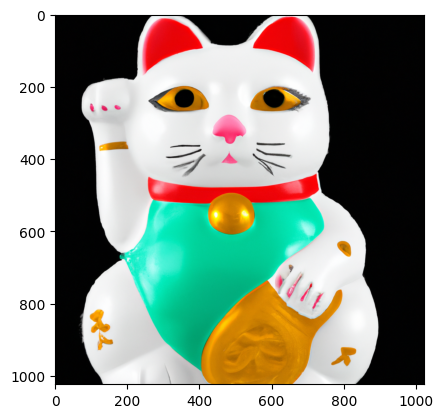

In [ ]:
response = openai.Image.create_variation(
  image=open("luckyCat.png", "rb"),
  n=1,
  size="1024x1024"
)
image_url = response['data'][0]['url']
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.show()

In [ ]:
response = openai.Image.create_edit(
  image=open("KyotoCityStreet.png", "rb"),
  mask=open("KyotoCityStreetMask.png", "rb"),
  prompt="An old street in Kyoto with a teddybear",
  n=1,
  size="1024x1024"
)
image_url = response['data'][0]['url']

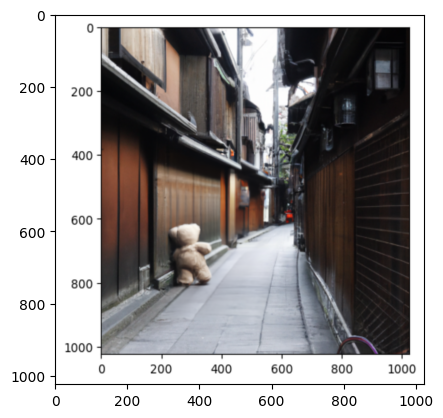

In [ ]:
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.show()

In [ ]:
response = openai.Image.create_edit(
  image=open("KyotoCityStreet.png", "rb"),
  mask=open("KyotoCityStreetMask.png", "rb"),
  prompt="An old street in Kyoto with godzilla",
  n=1,
  size="1024x1024"
)
image_url = response['data'][0]['url']

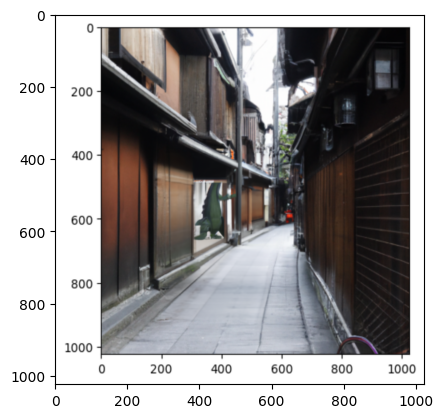

In [ ]:
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.show()

#OpenAI Audio

In [ ]:
audio_file= open("JapaneseLearning.mp3", "rb")
transcript = openai.Audio.transcribe("whisper-1", audio_file)
transcript["text"]

'出席を取ります。 トンさん。 はい。 マルシアさん。 はい。'

In [ ]:
audio_file= open("JapaneseLearning.mp3", "rb")
transcript = openai.Audio.transcribe("whisper-1", audio_file, response_format="srt")
print(transcript)

1
00:00:00,000 --> 00:00:02,000
出席を取ります。

2
00:00:02,000 --> 00:00:04,000
トンさん。

3
00:00:04,000 --> 00:00:05,000
はい。

4
00:00:05,000 --> 00:00:07,000
マルシアさん。

5
00:00:07,000 --> 00:00:08,000
はい。



